<a href="https://colab.research.google.com/github/bhargavnarasimha14/Bhargav-sai/blob/main/Anumala__Bhargav_Sai_Narasimha_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
from collections import defaultdict, Counter
import re

# generating N-Grams
def get_ngrams(text, n):
    words = text.split()
    return [tuple(words[i:i+n]) for i in range(len(words)-n+1)]

# function for counting n-grams
def count_ngrams(texts, n):
    ngram_counts = defaultdict(int)
    for text in texts:
        ngrams = get_ngrams(text, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return dict(ngram_counts)

# function for calculating bigram probabilities
def calculate_bigram_probabilities(texts):
    bigram_counts = count_ngrams(texts, 2)
    unigram_counts = count_ngrams(texts, 1)

    bigram_probs = {}
    for bigram, count in bigram_counts.items():
        first_word = bigram[0]
        prob = count / unigram_counts.get((first_word,), 1)  # Safeguard for missing unigrams
        bigram_probs[bigram] = prob

    return bigram_probs

# function for extracting noun phrases
def extract_noun_phrases(text):
    words = text.split()
    noun_phrases = []
    determiners = {'the', 'a', 'an', 'this', 'that', 'these', 'those', 'my', 'your', 'his', 'her', 'their'}
    common_adjectives = {'good', 'product','machine','analysis','artificial','intelligence','support','regression','great', 'bad', 'nice', 'beautiful', 'amazing', 'awesome', 'terrible', 'brilliant', 'dark'}

    for i in range(len(words)-2):
        if words[i].lower() in determiners:
            phrase = f"{words[i+1]} {words[i+2]}"
            noun_phrases.append(phrase.lower())

    for i in range(len(words)-1):
        if words[i].lower() in common_adjectives:
            phrase = f"{words[i]} {words[i+1]}"
            noun_phrases.append(phrase.lower())

    return list(set(noun_phrases))

# function for calculating relative probabilities of noun phrases
def calculate_relative_probabilities(texts):
    all_noun_phrases = Counter()
    text_noun_phrases = []

    for text in texts:
        phrases = extract_noun_phrases(text)
        text_noun_phrases.append(phrases)
        all_noun_phrases.update(phrases)

    max_freq = max(all_noun_phrases.values()) if all_noun_phrases else 1

    relative_probs = []
    for phrases in text_noun_phrases:
        text_probs = {phrase: all_noun_phrases[phrase] / max_freq if phrase in phrases else 0
                      for phrase in all_noun_phrases}
        relative_probs.append(text_probs)

    return relative_probs, list(all_noun_phrases.keys())

def main():
    # load the dataset
    df = pd.read_csv('cleaned_acm.csv')
    texts = df['cleaned_abstract'].tolist()

    # counting trigram frequencies
    trigram_counts = count_ngrams(texts, 3)
    print("Top 10 trigram frequencies :")
    for trigram, count in sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(trigram)}: {count}")

    # calculating bigram probabilities
    bigram_probs = calculate_bigram_probabilities(texts)
    print("\nTop 10 Bigram Probabilities:")
    for bigram, prob in sorted(bigram_probs.items(), key=lambda x: x[1], reverse=True)[:10]:
        print(f"{' '.join(bigram)}: {prob:.3f}")

    relative_probs, noun_phrases = calculate_relative_probabilities(texts)
    if noun_phrases:
        prob_df = pd.DataFrame(relative_probs, columns=noun_phrases)
        prob_df.index = [f"Review_{i+1}" for i in range(len(relative_probs))]
        prob_df.to_csv('noun_phrase_probabilities.csv')
        print("\nNoun Phrase Probability Table saved to 'noun_phrase_probabilities.csv'")
        print(prob_df.iloc[:5, :5])
    else:
        print("\nNo noun phrases found in the texts")

if __name__ == "__main__":
    main()


Top 10 trigram frequencies :
machin learn ml: 327
machin learn model: 78
use machin learn: 60
learn ml model: 42
machin learn algorithm: 42
machin learn techniqu: 38
applic machin learn: 29
internet thing iot: 26
machin learn method: 25
artifici intellig ai: 25

Top 10 Bigram Probabilities:
hep commonli: 1.000
redund resolv: 1.000
nontabular data: 1.000
deepli consequenti: 1.000
reifi outdat: 1.000
passport misus: 1.000
immigr system: 1.000
dnnspecif function: 1.000
daunt task: 1.000
openaccess longitudin: 1.000

Noun Phrase Probability Table saved to 'noun_phrase_probabilities.csv'
          support vector  support iter  good produc  product servic  \
Review_1             0.0           0.0          0.0             0.0   
Review_2             0.0           0.0          0.0             0.0   
Review_3             0.0           0.0          0.0             0.0   
Review_4             0.0           0.0          0.0             0.0   
Review_5             0.0           0.0          0.0    

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict, Counter
from math import log, sqrt
# text preprocessing
def preprocess(text, stopwords):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    return [word for word in words if word not in stopwords]

#building the TF-IDF matrix
def calculate_tf_idf_matrix(documents, stopwords):
    processed_docs = [preprocess(doc, stopwords) for doc in documents]

    df_counts = defaultdict(int)
    tf_counts = [Counter(doc) for doc in processed_docs]
    for tf in tf_counts:
        for term in tf.keys():
            df_counts[term] += 1

    N = len(documents)
    tf_idf_matrix = []
    vocabulary = sorted(df_counts.keys())
    for tf in tf_counts:
        doc_vector = []
        for term in vocabulary:
            tf_value = tf[term]
            idf_value = log(N / (df_counts[term] + 1))
            tf_idf_value = tf_value * idf_value
            doc_vector.append(tf_idf_value)
        tf_idf_matrix.append(doc_vector)

    tf_idf_matrix = np.array(tf_idf_matrix)
    return tf_idf_matrix, vocabulary

#cosine similarity
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = sqrt(np.dot(vec1, vec1))
    norm_vec2 = sqrt(np.dot(vec2, vec2))
    return dot_product / (norm_vec1 * norm_vec2 + 1e-10)
#ranking documents
def rank_documents(query, tf_idf_matrix, documents, vocabulary, stopwords):
    query_terms = preprocess(query, stopwords)
    query_vector = np.zeros(len(vocabulary))
    query_counts = Counter(query_terms)
    for idx, term in enumerate(vocabulary):
        if term in query_counts:
            tf_value = query_counts[term]
            idf_value = log(len(documents) / (sum(1 for doc in documents if term in doc) + 1))
            query_vector[idx] = tf_value * idf_value

    scores = []
    for i, doc_vector in enumerate(tf_idf_matrix):
        score = cosine_similarity(doc_vector, query_vector)
        scores.append((i, score))

    ranked_docs = sorted(scores, key=lambda x: x[1], reverse=True) #ranking documents by score in descending order
    return ranked_docs

def main():
    df = pd.read_csv('cleaned_acm.csv')
    documents = df['cleaned_abstract'].tolist()

    #stopwords
    stopwords = set(["a", "and", "the", "in", "of", "on", "for", "with", "to", "as", "an", "at", "by", "this", "it", "is"])
    tf_idf_matrix, vocabulary = calculate_tf_idf_matrix(documents, stopwords)
    query = "An Outstanding movie with a haunting performance and best character development"

    #ranking documents
    ranked_docs = rank_documents(query, tf_idf_matrix, documents, vocabulary, stopwords)
    print("Top 10 Most Similar Documents:")
    print("Rank\tScore\tDocument Preview")
    print("------------------------------------------------------------")
    for rank, (doc_idx, score) in enumerate(ranked_docs[:10], 1):
        print(f"{rank}\t{score:.4f}\t{documents[doc_idx][:50]}...")

if __name__ == "__main__":
    main()


Top 10 Most Similar Documents:
Rank	Score	Document Preview
------------------------------------------------------------
1	0.2137	systemat review literatur statist machin learn sch...
2	0.1597	goal tutori give introduct machin learn use suppor...
3	0.1595	machin learn ml research studi best practic develo...
4	0.1519	recent trend toward larg machin learn model requir...
5	0.1512	machin learn wide use solv challeng problem diver ...
6	0.1398	sixth intern workshop autom machin learn aim ident...
7	0.1276	mlhat workshop aim bring togeth academ research in...
8	0.1203	learn style play vital role determin individu stud...
9	0.1137	fair common standard machin learn principl ethic d...
10	0.1094	read product review best way know product qualiti ...


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


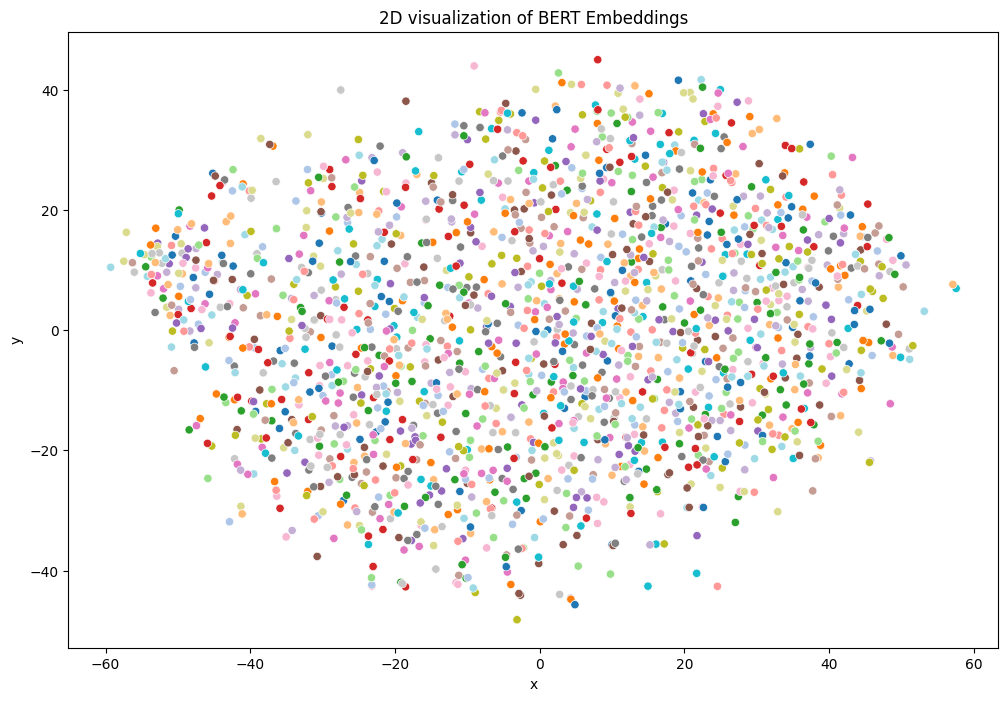

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from transformers import BertTokenizer, BertModel
import torch

# preprocessing
df = pd.read_csv('cleaned_acm.csv')
texts = df['cleaned_abstract'].tolist()
#loading bert
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(texts):
    embeddings = []
    with torch.no_grad():
        for text in texts:
            # tokenization
            inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
            outputs = model(**inputs)
            cls_embedding = outputs.last_hidden_state[:, 0, :].numpy()
            embeddings.append(cls_embedding.flatten())
    return embeddings

document_embeddings = get_bert_embeddings(texts)

document_embeddings_array = np.vstack(document_embeddings)
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(document_embeddings_array)

# creating dataframe for plotting
df_tsne = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df_tsne['text'] = texts
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", data=df_tsne, hue="text", palette="tab20", legend=None)
plt.title("2D visualization of BERT Embeddings")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/bhargavnarasimha14/Clened-review



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
Challenges i faced are Understanding BERT embeddings but i also enjoyed working with BERT and amout of time
give to complete this assignment is reasonable.